# Use all the features to predict various objectives

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import string
from scipy.stats import norm
import scipy.stats as stats
import rpy2

import notebook.nbextensions
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import ticker
import matplotlib.dates as mdates

import numpy as np, pylab as pl
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.externals import joblib
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest

from scipy.stats import sem

from __future__ import division


In [95]:
%matplotlib inline

In [96]:
sns.set_style("whitegrid")

In [97]:
repos_path = "/Users/Clayton/temporal-features-for-buildings/"

In [98]:
meta = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)
temp = pd.read_csv((os.path.join(repos_path,"data/interim/temp_open_utc_complete.csv")), index_col='timestamp', parse_dates=True).tz_localize('utc')


In [99]:
features = pd.read_csv((os.path.join(repos_path, "data/processed/ALLFEATURES.CSV")), index_col='Unnamed: 0')

In [100]:
def plot_confusion_matrix(cm, categories, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks,categories, rotation=90)
    plt.yticks(tick_marks,categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [101]:
meta

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
PrimClass_Everett,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.00000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
UnivClass_Clifford,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.00000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
Office_Elizabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.00000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.00000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
PrimClass_Elisabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.00000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv
Office_Cristina,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,92271.00000,8572.252713,College/University,America/New_York,2001,Cristina,Office,weather2.csv
PrimClass_Jolie,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,2.0,212.0,Primary/Secondary Classroom,C,31505.93530,2927.000000,Primary/Secondary School,Europe/London,pre 1919,Jolie,PrimClass,weather1.csv
PrimClass_Jaylin,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,2.0,219.0,Primary/Secondary Classroom,C,47070.53470,4373.000000,Primary/Secondary School,Europe/London,1919-1945,Jaylin,PrimClass,weather1.csv
Office_Jesus,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Government,Gas,1.0,40.0,Office,C,42646.57180,3962.000000,"City, County, State",Europe/London,Post 1976,Jesus,Office,weather1.csv


In [102]:
features = features.fillna(0)

In [160]:
def runmodel(features, meta, target_name):
    target = meta.sort_index()[target_name]
    target = target.dropna()
    features = features.T[target.index].T
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.7, random_state=2)
    model_rf = RandomForestClassifier(oob_score = True, max_features = 'auto', n_estimators = 100, min_samples_leaf = 2, 
                                          random_state = 2)
    model_rf.fit(features_train, target_train)
    #mean_model_accuracy = model_rf.score(features_test, target_test)
    mean_model_accuracy = model_rf.oob_score_
    print "Model accuracy: "+str(mean_model_accuracy)
    #accuracy[key] = mean_model_accuracy

    #Dummy Classifier model to get a baseline
    baseline_rf = DummyClassifier(strategy='stratified',random_state=0)
    baseline_rf.fit(features_train, target_train)
    #DummyClassifier(constant=None, random_state=1, strategy='most_frequent')
    baseline_model_accuracy = baseline_rf.score(features_test, target_test)
    print "Model accuracy: "+str(baseline_model_accuracy) 
    #accuracy["Baseline"] = baseline_model_accuracy

    #Create the classification report for the real model
    y_pred = model_rf.predict(features_test)
    y_true = np.array(target_test)
    categories = np.array(target.sort_values().unique())
    print classification_report(y_true, y_pred)

    #from: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    importances = model_rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(features.shape[1])[:20]:
        print("%d. feature %s (%f)" % (f + 1, features.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(15,4))
    plt.title("Feature importances")
    plt.bar(range(features.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(features.shape[1]), indices)
    plt.xlim([-1, features.shape[1]])
    plt.show()

    # Compute confusion matrix: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    sns.set(font_scale=1.4)
    cm = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure(figsize=(12,10))
    plot_confusion_matrix(cm, categories)


    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure(figsize=(12,10))
    plot_confusion_matrix(cm_normalized, categories, title='Normalized Classification Error Matrix')
    plt.savefig("ErrorMatrix.pdf")

    plt.show()
    
    return mean_model_accuracy, baseline_model_accuracy, target

# Building Use Type

Model accuracy: 0.690789473684
Model accuracy: 0.228169014085
             precision    recall  f1-score   support

     Office       0.51      0.84      0.64       103
  PrimClass       0.95      0.82      0.88        73
  UnivClass       0.69      0.15      0.25        60
   UnivDorm       0.96      0.83      0.89        53
    UnivLab       0.64      0.62      0.63        66

avg / total       0.72      0.68      0.66       355

Feature ranking:
1. feature BG_jmotif_inclasssim_168_6_14 (0.028142)
2. feature BG_stlweeklypattern_sun_mean (0.024803)
3. feature BG_stlreminder_aug_mean (0.023949)
4. feature BG_weeklyspecificity_std (0.021178)
5. feature BG_stlreminder_jul_mean (0.021144)
6. feature BG_weeklyspecificity_max (0.021033)
7. feature BG_visdom_BG_visdom_kwvarwinter (0.018331)
8. feature BG_dailyspecificity_mean (0.018205)
9. feature BG_visdom_BG_visdom_BG_visdom_kwvarsummer (0.016548)
10. feature BG_breakouts_max_30_1_5 (0.016476)
11. feature BG_visdom_kwvar (0.015398)
12. fea

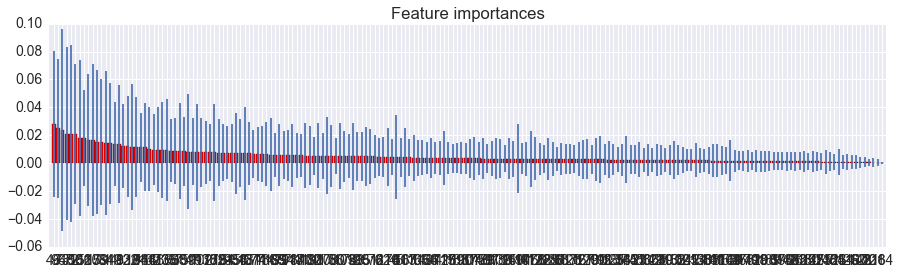

Confusion matrix, without normalization
[[87  1  1  1 13]
 [13 60  0  0  0]
 [40  2  9  1  8]
 [ 7  0  0 44  2]
 [22  0  3  0 41]]
Normalized confusion matrix
[[ 0.84  0.01  0.01  0.01  0.13]
 [ 0.18  0.82  0.    0.    0.  ]
 [ 0.67  0.03  0.15  0.02  0.13]
 [ 0.13  0.    0.    0.83  0.04]
 [ 0.33  0.    0.05  0.    0.62]]


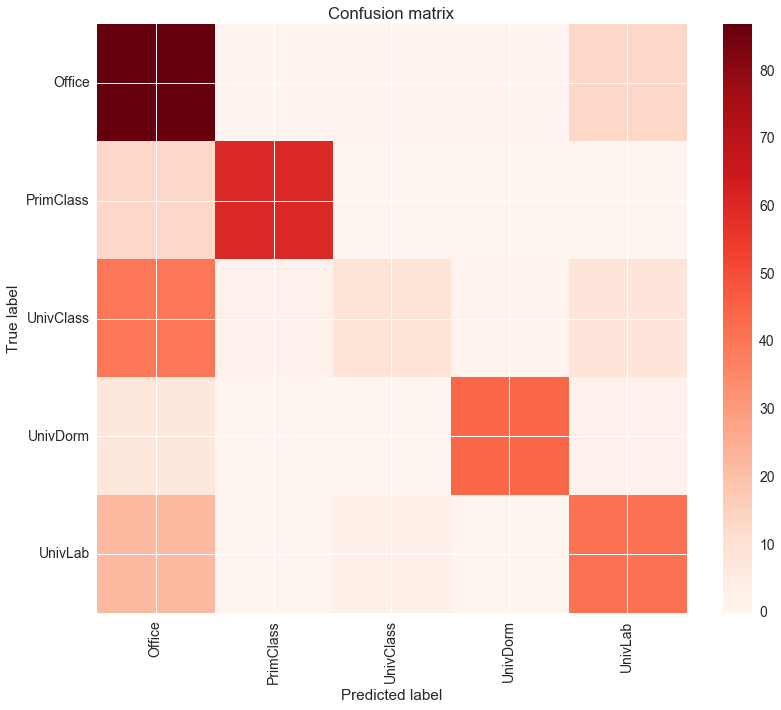

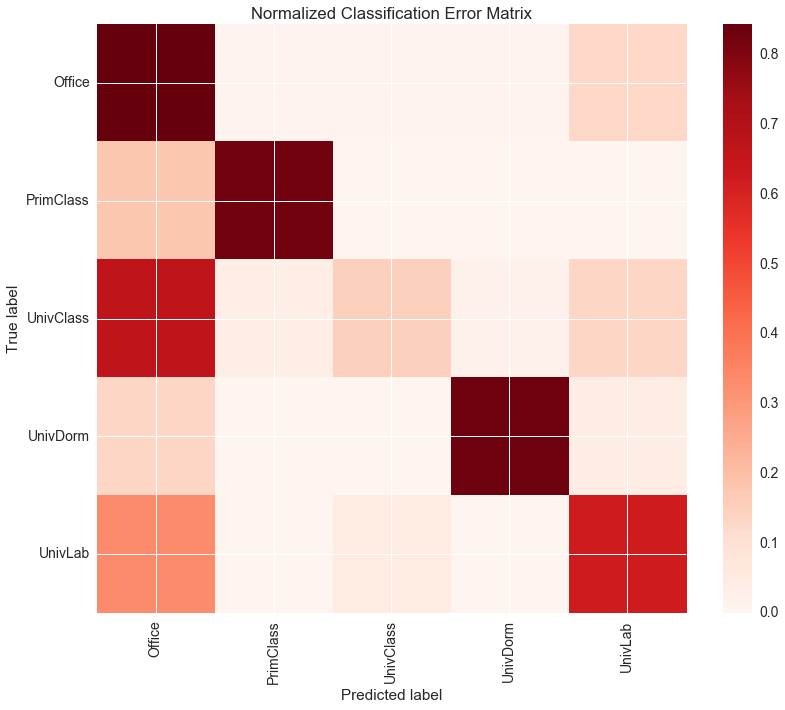

In [161]:
allmetricsaccuracy, baseline_model_accuracy, target = runmodel(features, meta, "primaryspaceuse_abbrev")

# Building Performance Class

In [162]:
meta['dailymeancons'] = features.BG_normalizedcons_mean

In [163]:
def categorize_2level(df, x):
    if x.dailymeancons < df[(df['primaryspaceusage'] == x['primaryspaceusage'])].dailymeancons.quantile(.5):
        return "Below Average"
    else:
        return "Above Average"

def categorize_3level(df, x):
    if x.dailymeancons < df[(df['primaryspaceusage'] == x['primaryspaceusage'])].dailymeancons.quantile(.333):
        return "Low"
    elif x.dailymeancons > df[(df['primaryspaceusage'] == x['primaryspaceusage'])].dailymeancons.quantile(.677):
        return "High"
    else:
        return "Medium"
    

In [164]:
meta["usagecategory"] = meta.apply(lambda x: categorize_3level(meta, x), axis=1)

In [165]:
meta

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,dailymeancons,usagecategory
uid,,,,,,,,,,,,,,,,,,,,
PrimClass_Everett,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.00000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv,0.005935,Low
UnivClass_Clifford,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.00000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv,0.006464,Low
Office_Elizabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.00000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv,0.007931,Low
Office_Ellie,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.00000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv,0.008237,Low
PrimClass_Elisabeth,2012-12-31 23:00:00,2012-01-01,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.00000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv,0.008597,Low
Office_Cristina,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,92271.00000,8572.252713,College/University,America/New_York,2001,Cristina,Office,weather2.csv,0.009302,Low
PrimClass_Jolie,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,2.0,212.0,Primary/Secondary Classroom,C,31505.93530,2927.000000,Primary/Secondary School,Europe/London,pre 1919,Jolie,PrimClass,weather1.csv,0.010486,Low
PrimClass_Jaylin,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,2.0,219.0,Primary/Secondary Classroom,C,47070.53470,4373.000000,Primary/Secondary School,Europe/London,1919-1945,Jaylin,PrimClass,weather1.csv,0.012248,Low
Office_Jesus,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Government,Gas,1.0,40.0,Office,C,42646.57180,3962.000000,"City, County, State",Europe/London,Post 1976,Jesus,Office,weather1.csv,0.011333,Low


In [166]:
list(features.columns)

['BG_breakouts_max_10_2_2',
 'BG_breakouts_max_10_2_3',
 'BG_breakouts_max_10_2_5',
 'BG_breakouts_max_10_5_2',
 'BG_breakouts_max_10_5_3',
 'BG_breakouts_max_10_5_5',
 'BG_breakouts_max_10_1_2',
 'BG_breakouts_max_10_1_3',
 'BG_breakouts_max_10_1_5',
 'BG_breakouts_max_30_2_2',
 'BG_breakouts_max_30_2_3',
 'BG_breakouts_max_30_2_5',
 'BG_breakouts_max_30_5_2',
 'BG_breakouts_max_30_5_3',
 'BG_breakouts_max_30_5_5',
 'BG_breakouts_max_30_1_2',
 'BG_breakouts_max_30_1_3',
 'BG_breakouts_max_30_1_5',
 'BG_breakouts_max_60_2_2',
 'BG_breakouts_max_60_2_3',
 'BG_breakouts_max_60_2_5',
 'BG_breakouts_max_60_5_2',
 'BG_breakouts_max_60_5_3',
 'BG_breakouts_max_60_5_5',
 'BG_breakouts_max_60_1_2',
 'BG_breakouts_max_60_1_3',
 'BG_breakouts_max_60_1_5',
 'BG_dayfilterfreq_mean',
 'BG_dayfilterfreq_std',
 'BG_dayfilterfreq_min',
 'BG_dayfilterfreq_max',
 'BG_eemeter_cooling_mean',
 'BG_eemeter_cooling_std',
 'BG_eemeter_cooling_min',
 'BG_eemeter_cooling_max',
 'BG_eemeter_heating_mean',
 'BG_e

In [167]:
nonconsfeatures = ['BG_breakouts_max_10_2_2',
 'BG_breakouts_max_10_2_3',
 'BG_breakouts_max_10_2_5',
 'BG_breakouts_max_10_5_2',
 'BG_breakouts_max_10_5_3',
 'BG_breakouts_max_10_5_5',
 'BG_breakouts_max_10_1_2',
 'BG_breakouts_max_10_1_3',
 'BG_breakouts_max_10_1_5',
 'BG_breakouts_max_30_2_2',
 'BG_breakouts_max_30_2_3',
 'BG_breakouts_max_30_2_5',
 'BG_breakouts_max_30_5_2',
 'BG_breakouts_max_30_5_3',
 'BG_breakouts_max_30_5_5',
 'BG_breakouts_max_30_1_2',
 'BG_breakouts_max_30_1_3',
 'BG_breakouts_max_30_1_5',
 'BG_breakouts_max_60_2_2',
 'BG_breakouts_max_60_2_3',
 'BG_breakouts_max_60_2_5',
 'BG_breakouts_max_60_5_2',
 'BG_breakouts_max_60_5_3',
 'BG_breakouts_max_60_5_5',
 'BG_breakouts_max_60_1_2',
 'BG_breakouts_max_60_1_3',
 'BG_breakouts_max_60_1_5',
 'BG_dayfilterfreq_mean',
 'BG_dayfilterfreq_std',
 'BG_dayfilterfreq_min',
 'BG_dayfilterfreq_max',
 'BG_eemeter_cooling_mean',
 'BG_eemeter_cooling_std',
 'BG_eemeter_cooling_min',
 'BG_eemeter_cooling_max',
 'BG_eemeter_heating_mean',
 'BG_eemeter_heating_std',
 'BG_eemeter_heating_min',
 'BG_eemeter_heating_max',
 'BG_eemeter_baseload',
 'BG_eemeter_heatbalpt',
 'BG_eemeter_heatslope',
 'BG_eemeter_coolbalpt',
 'BG_eemeter_coolslope',
 'BG_eemeter_nmbe',
 'BG_eemeter_cvrmse',
 'BG_jmotif_inclasssim_168_6_14',
 'BG_weeklyspecificity_mean',
 'BG_weeklyspecificity_std',
 'BG_weeklyspecificity_min',
 'BG_weeklyspecificity_max',
 'BG_jmotif_inclasssim_24_8_8',
 'BG_dailyspecificity_mean',
 'BG_dailyspecificity_std',
 'BG_dailyspecificity_min',
 'BG_dailyspecificity_max',
 'BG_loadshape_corr_interval',
 'BG_loadshape_corr_interval_daytime',
 'BG_loadshape_mape_interval',
 'BG_loadshape_mape_interval_daytime',
 'BG_loadshape_rmse_interval',
 'BG_loadshape_rmse_interval_daytime',
#  'BG_normalizedcons_mean',
#  'BG_normalizedcons_std',
#  'BG_normalizedcons_min',
#  'BG_normalizedcons_max',
 'BG_stlreminder_jan_mean',
 'BG_stlreminder_feb_mean',
 'BG_stlreminder_mar_mean',
 'BG_stlreminder_apr_mean',
 'BG_stlreminder_may_mean',
 'BG_stlreminder_jun_mean',
 'BG_stlreminder_jul_mean',
 'BG_stlreminder_aug_mean',
 'BG_stlreminder_sep_mean',
 'BG_stlreminder_oct_mean',
 'BG_stlreminder_nov_mean',
 'BG_stlreminder_dec_mean',
 'BG_stltrend_jan_mean',
 'BG_stltrend_feb_mean',
 'BG_stltrend_mar_mean',
 'BG_stltrend_apr_mean',
 'BG_stltrend_may_mean',
 'BG_stltrend_jun_mean',
 'BG_stltrend_jul_mean',
 'BG_stltrend_aug_mean',
 'BG_stltrend_sep_mean',
 'BG_stltrend_oct_mean',
 'BG_stltrend_nov_mean',
 'BG_stltrend_dec_mean',
 'BG_stlweeklypattern_mon_mean',
 'BG_stlweeklypattern_tue_mean',
 'BG_stlweeklypattern_wed_mean',
 'BG_stlweeklypattern_thur_mean',
 'BG_stlweeklypattern_fri_mean',
 'BG_stlweeklypattern_sat_mean',
 'BG_stlweeklypattern_sun_mean',
 'BG_visdom_Aug_dur',
 'BG_visdom_Aug_max',
 'BG_visdom_Aug_mean',
 'BG_visdom_Aug_min',
 'BG_visdom_Aug_mn2mx',
 'BG_visdom_Aug_n2d',
 'BG_visdom_Aug_range',
 'BG_visdom_HODmean1',
 'BG_visdom_HODmean10',
 'BG_visdom_HODmean11',
 'BG_visdom_HODmean12',
 'BG_visdom_HODmean13',
 'BG_visdom_HODmean14',
 'BG_visdom_HODmean15',
 'BG_visdom_HODmean16',
 'BG_visdom_HODmean17',
 'BG_visdom_HODmean18',
 'BG_visdom_HODmean19',
 'BG_visdom_HODmean2',
 'BG_visdom_HODmean20',
 'BG_visdom_HODmean21',
 'BG_visdom_HODmean22',
 'BG_visdom_HODmean23',
 'BG_visdom_HODmean24',
 'BG_visdom_HODmean3',
 'BG_visdom_HODmean4',
 'BG_visdom_HODmean5',
 'BG_visdom_HODmean6',
 'BG_visdom_HODmean7',
 'BG_visdom_HODmean8',
 'BG_visdom_HODmean9',
 'BG_visdom_Jan_dur',
 'BG_visdom_Jan_max',
 'BG_visdom_Jan_mean',
 'BG_visdom_Jan_min',
 'BG_visdom_Jan_mn2mx',
 'BG_visdom_Jan_n2d',
 'BG_visdom_Jan_range',
 'BG_visdom_dailykwmaxvar',
 'BG_visdom_dailykwminvar',
 'BG_visdom_dailykwvar',
 'BG_visdom_datefirst',
 'BG_visdom_datelast',
 'BG_visdom_dur',
 'BG_visdom_kwmean',
 'BG_visdom_kwmeanannual',
 'BG_visdom_kwmeansummer',
 'BG_visdom_kwmeanwinter',
 'BG_visdom_kwtotal',
 'BG_visdom_kwtotalApr',
 'BG_visdom_kwtotalAug',
 'BG_visdom_kwtotalDec',
 'BG_visdom_kwtotalFeb',
 'BG_visdom_kwtotalJan',
 'BG_visdom_kwtotalJul',
 'BG_visdom_kwtotalJun',
 'BG_visdom_kwtotalMar',
 'BG_visdom_kwtotalMay',
 'BG_visdom_kwtotalNov',
 'BG_visdom_kwtotalOct',
 'BG_visdom_kwtotalSep',
 'BG_visdom_kwtoutcor',
 'BG_visdom_kwvar',
 'BG_visdom_BG_visdom_BG_visdom_kwvarsummer',
 'BG_visdom_BG_visdom_kwvarwinter',
 'BG_visdom_kw90',
 'BG_visdom_BG_visdom_max',
 'BG_visdom_max97',
 'BG_visdom_maxMA',
 'BG_visdom_maxdaydate',
 'BG_visdom_maxdaykw',
 'BG_visdom_BG_visdom_maxdaypct',
 'BG_visdom_maxdaytout',
 'BG_visdom_maxhrdate',
 'BG_visdom_maxhrkw',
 'BG_visdom_maxhrtout',
 'BG_visdom_maxHOD',
 'BG_visdom_mean',
 'BG_visdom_min',
 'BG_visdom_min3',
 'BG_visdom_mindaydate',
 'BG_visdom_mindaykw',
 'BG_visdom_mindaypct',
 'BG_visdom_mindaytout',
 'BG_visdom_minhrdate',
 'BG_visdom_minhrkw',
 'BG_visdom_minhrtout',
 'BG_visdom_mn2mx',
 'BG_visdom_n2d',
 'BG_visdom_nv2dv',
 'BG_visdom_range',
 'BG_visdom_t10kw',
 'BG_visdom_t10t',
 'BG_visdom_t90kw',
 'BG_visdom_t90t']

In [168]:
features_noncons = features[nonconsfeatures]

Model accuracy: 0.625
Model accuracy: 0.332394366197
             precision    recall  f1-score   support

       High       0.50      0.76      0.60       105
        Low       0.62      0.67      0.65       119
     Medium       0.49      0.24      0.33       131

avg / total       0.54      0.54      0.51       355

Feature ranking:
1. feature BG_eemeter_heating_mean (0.029780)
2. feature BG_eemeter_heating_max (0.023002)
3. feature BG_eemeter_heating_std (0.017810)
4. feature BG_weeklyspecificity_max (0.016189)
5. feature BG_visdom_BG_visdom_kwvarwinter (0.014197)
6. feature BG_visdom_kwtotalJan (0.013214)
7. feature BG_loadshape_mape_interval_daytime (0.012920)
8. feature BG_stltrend_aug_mean (0.012851)
9. feature BG_loadshape_rmse_interval_daytime (0.012287)
10. feature BG_eemeter_coolslope (0.012229)
11. feature BG_stlreminder_aug_mean (0.012001)
12. feature BG_eemeter_cooling_std (0.011792)
13. feature BG_stlreminder_sep_mean (0.011237)
14. feature BG_visdom_range (0.011054)
15

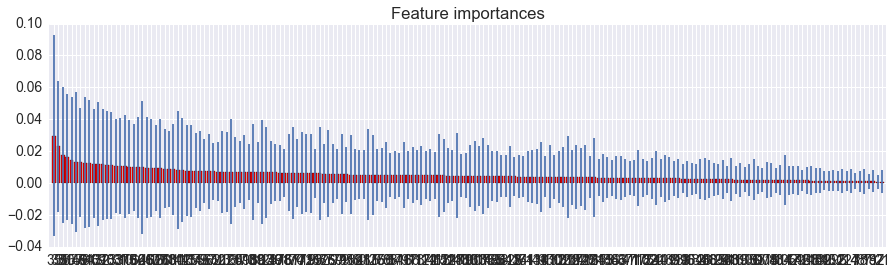

Confusion matrix, without normalization
[[80 11 14]
 [20 80 19]
 [61 38 32]]
Normalized confusion matrix
[[ 0.76  0.1   0.13]
 [ 0.17  0.67  0.16]
 [ 0.47  0.29  0.24]]


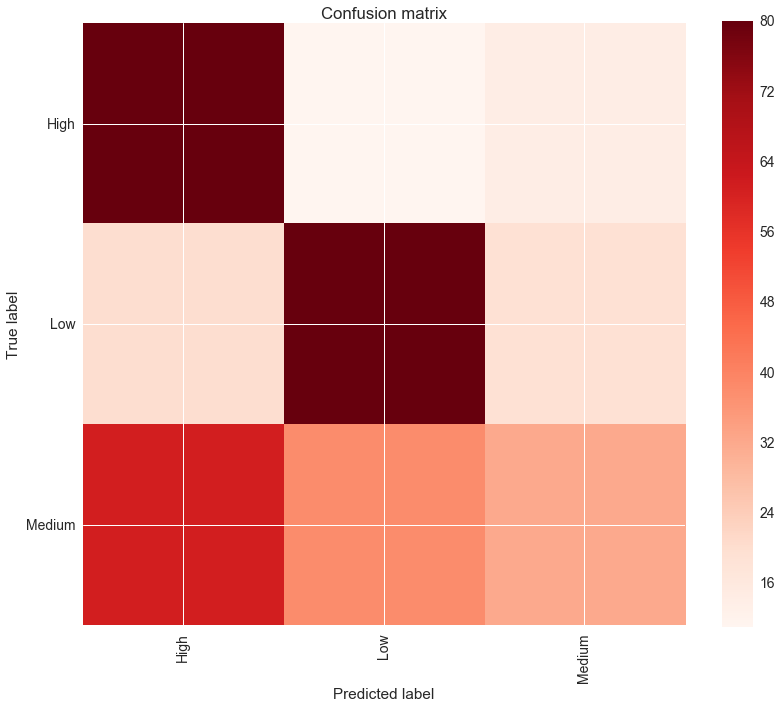

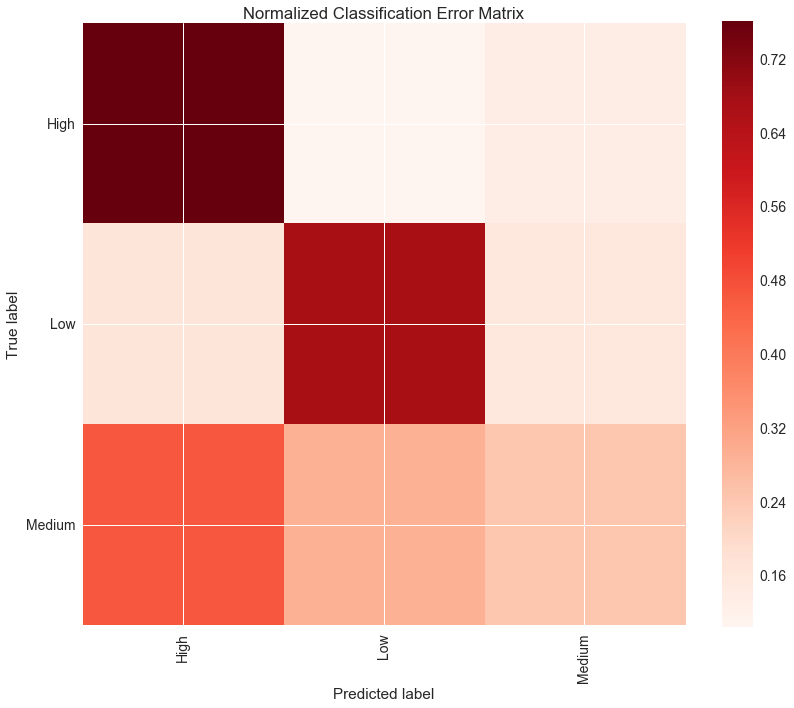

In [169]:
allmetricsaccuracy, baseline_model_accuracy, target = runmodel(features_noncons, meta, "usagecategory")

# Inclass differences

In [170]:
features_office = features_noncons[features_noncons.index.str.contains("Office")]
meta_office = meta[meta.index.str.contains("Office")]

In [171]:
features_primsec = features_noncons[features_noncons.index.str.contains("PrimClass")]
meta_primsec = meta[meta.index.str.contains("PrimClass")]

Model accuracy: 0.774193548387
Model accuracy: 0.324324324324
             precision    recall  f1-score   support

       High       0.58      0.79      0.67        19
        Low       0.92      0.82      0.87        28
     Medium       0.74      0.63      0.68        27

avg / total       0.77      0.74      0.75        74

Feature ranking:
1. feature BG_visdom_n2d (0.037605)
2. feature BG_weeklyspecificity_max (0.028459)
3. feature BG_visdom_dailykwminvar (0.026657)
4. feature BG_stlreminder_sep_mean (0.025793)
5. feature BG_breakouts_max_30_1_5 (0.023028)
6. feature BG_eemeter_heating_max (0.022466)
7. feature BG_loadshape_corr_interval_daytime (0.022425)
8. feature BG_loadshape_mape_interval (0.022026)
9. feature BG_breakouts_max_10_2_5 (0.020110)
10. feature BG_eemeter_cooling_max (0.020011)
11. feature BG_eemeter_cvrmse (0.019637)
12. feature BG_stltrend_aug_mean (0.018934)
13. feature BG_visdom_BG_visdom_BG_visdom_kwvarsummer (0.018559)
14. feature BG_stlreminder_aug_mean (0.

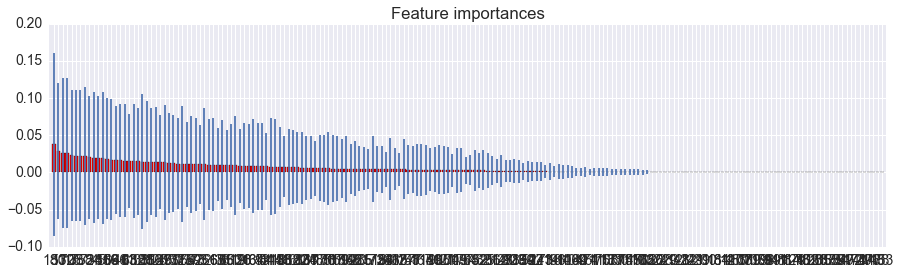

Confusion matrix, without normalization
[[15  1  3]
 [ 2 23  3]
 [ 9  1 17]]
Normalized confusion matrix
[[ 0.79  0.05  0.16]
 [ 0.07  0.82  0.11]
 [ 0.33  0.04  0.63]]


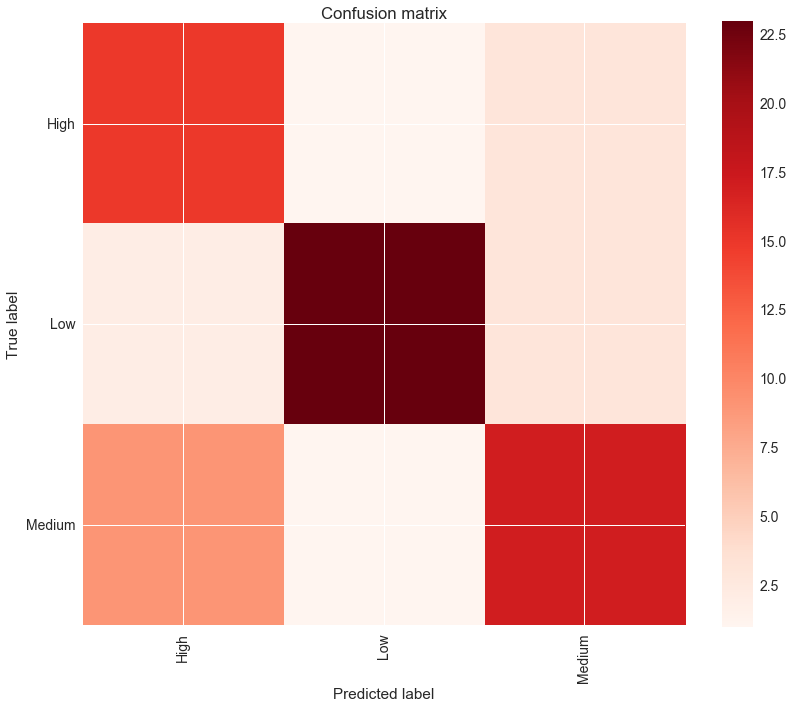

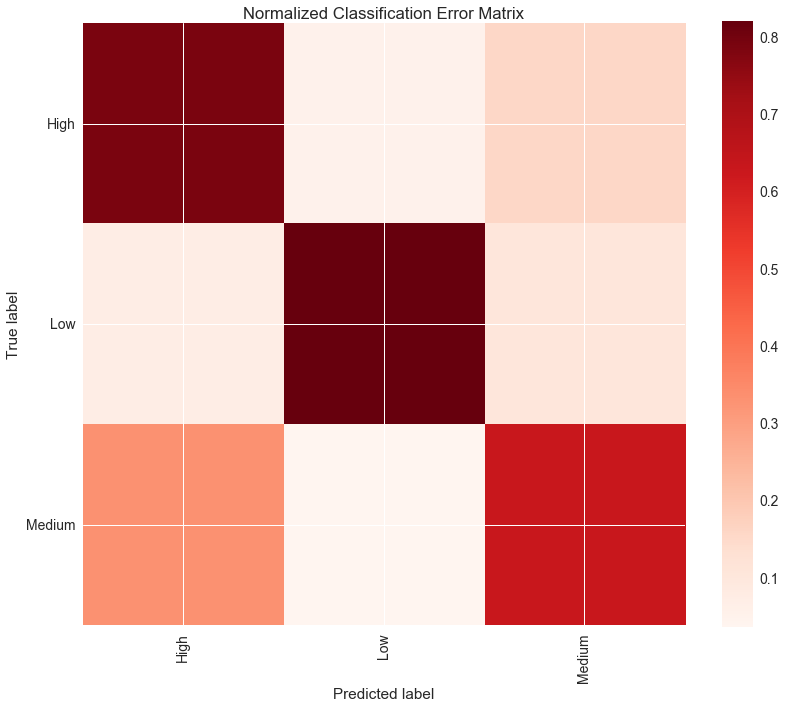

In [172]:
allmetricsaccuracy, baseline_model_accuracy, target = runmodel(features_primsec, meta_primsec, "usagecategory")

Model accuracy: 0.739130434783
Model accuracy: 0.309090909091
             precision    recall  f1-score   support

       High       0.51      0.62      0.56        34
        Low       0.51      0.65      0.57        34
     Medium       0.42      0.26      0.32        42

avg / total       0.48      0.49      0.47       110

Feature ranking:
1. feature BG_visdom_kwtotalJan (0.048895)
2. feature BG_visdom_kwtotalDec (0.042968)
3. feature BG_visdom_HODmean6 (0.033196)
4. feature BG_visdom_Jan_max (0.032739)
5. feature BG_visdom_Jan_mean (0.028060)
6. feature BG_breakouts_max_30_2_2 (0.026337)
7. feature BG_visdom_Jan_min (0.025281)
8. feature BG_visdom_kwmeanwinter (0.021441)
9. feature BG_visdom_kwtotalNov (0.018560)
10. feature BG_visdom_HODmean7 (0.018387)
11. feature BG_visdom_BG_visdom_BG_visdom_kwvarsummer (0.017814)
12. feature BG_visdom_nv2dv (0.017504)
13. feature BG_eemeter_heating_max (0.017455)
14. feature BG_eemeter_heating_mean (0.017183)
15. feature BG_visdom_HODmean4 (

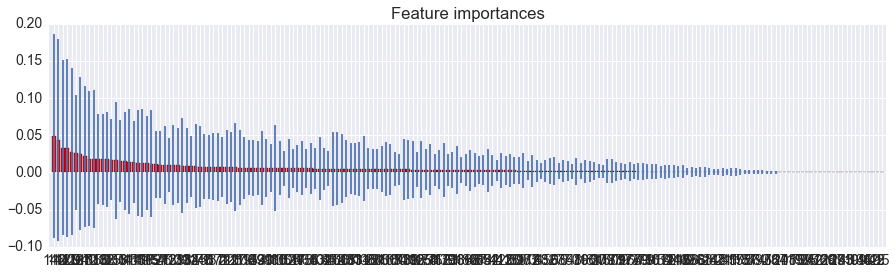

Confusion matrix, without normalization
[[21  5  8]
 [ 5 22  7]
 [15 16 11]]
Normalized confusion matrix
[[ 0.62  0.15  0.24]
 [ 0.15  0.65  0.21]
 [ 0.36  0.38  0.26]]


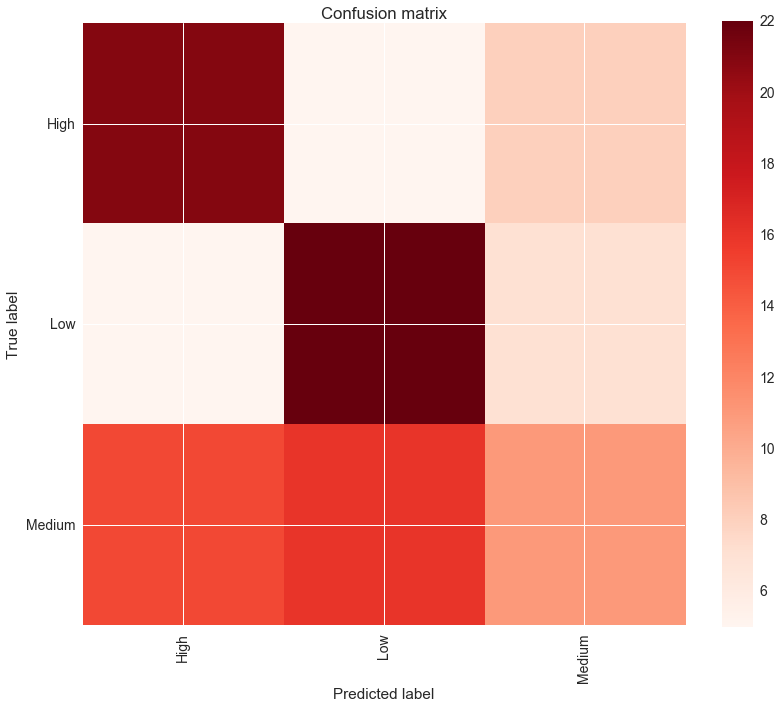

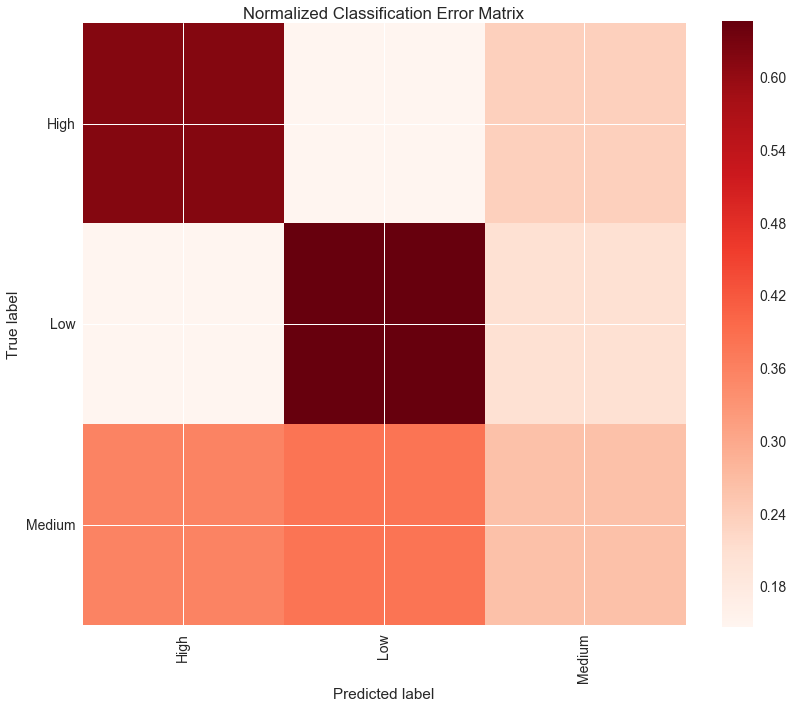

In [173]:
allmetricsaccuracy, baseline_model_accuracy, target = runmodel(features_office, meta_office, "usagecategory")

# Group operations-based

In [224]:
def get_group(x):
    if "_A" in x:
        return "Group1"
    elif "_J" in x:
        return "Group2"
    elif "_C" in x:
        return "Group3"
    elif "_M" in x:
        return "Group4"
    elif "_P" in x:
        return "Group5"
    elif "_L" in x:
        return "Group6"
    elif "_S" in x:
        return "Group7"
    elif "_B" in x:
        return "Group8"
    elif "_D" in x:
        return "Group8"
    elif "_N" in x:
        return "Group9"
    elif "_T" in x:
        return "Group10"
    elif "_U" in x:
        return "Group11"
    else:
        return "Misc"

In [225]:
meta.ix[0].name

'PrimClass_Everett'

In [227]:
meta["operationsgroup"] = meta.apply(lambda x: get_group(x.name), axis=1)

Model accuracy: 0.815789473684
Model accuracy: 0.135211267606
             precision    recall  f1-score   support

     Group1       0.94      0.99      0.96        77
    Group10       1.00      0.56      0.71         9
    Group11       0.00      0.00      0.00         4
     Group2       0.89      1.00      0.94        56
     Group3       0.89      1.00      0.94        58
     Group4       0.94      1.00      0.97        44
     Group5       0.89      0.62      0.73        26
     Group6       0.80      0.21      0.33        19
     Group7       0.43      0.71      0.54        14
     Group8       1.00      1.00      1.00         8
     Group9       1.00      0.25      0.40         8
       Misc       0.76      0.91      0.83        32

avg / total       0.87      0.87      0.85       355

Feature ranking:
1. feature BG_visdom_t10t (0.074053)
2. feature BG_visdom_t90t (0.046478)
3. feature BG_visdom_datelast (0.046015)
4. feature BG_visdom_datefirst (0.035133)
5. feature BG_loads

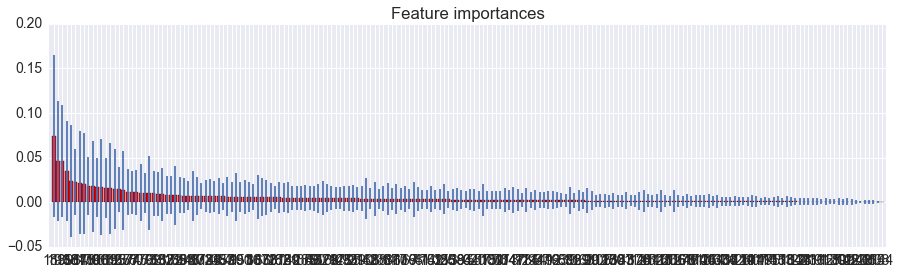

Confusion matrix, without normalization
[[76  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  5  0  2  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0  0  0]
 [ 3  0  0  0  7  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  4 11  0  0  2]
 [ 0  0  0  3  0  0  0  0 10  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  8  0  0]
 [ 2  0  0  0  0  2  1  0  1  0  2  0]
 [ 0  0  0  1  0  0  0  1  1  0  0 29]]
Normalized confusion matrix
[[ 0.99  0.    0.    0.01  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.56  0.    0.22  0.    0.    0.    0.    0.    0.    0.    0.22]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.12  0.  

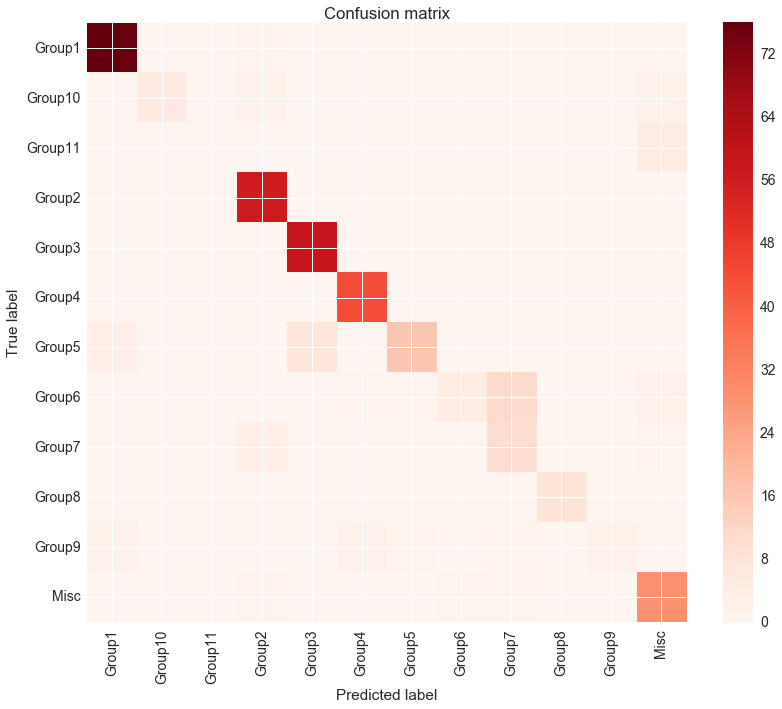

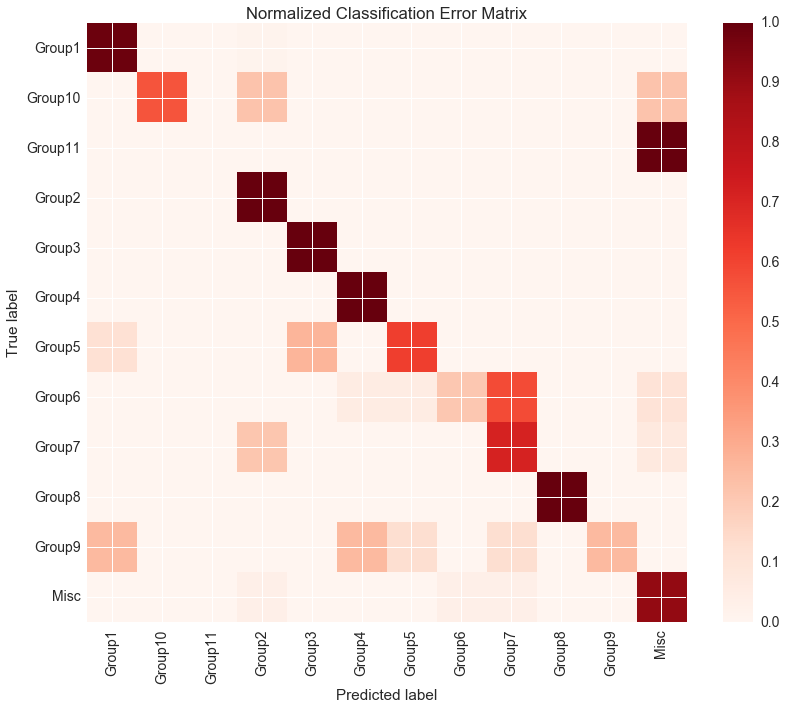

In [228]:
allmetricsaccuracy, baseline_model_accuracy, target = runmodel(features, meta, "operationsgroup")

In [229]:
meta.to_csv(os.path.join(repos_path,"data/raw/meta_open_withperformanceclasses.csv"))

# Rating based

In [174]:
meta_primsec.rating.value_counts()

D    30
C    25
E    10
F     2
G     2
B     1
Name: rating, dtype: int64

In [175]:
allmetricsaccuracy, baseline_model_accuracy = runmodel(metrics, meta, "primaryspaceuse_abbrev")

AttributeError: 'module' object has no attribute 'T'

In [ ]:
accuracy = {"Baseline Classification Model":baseline_model_accuracy, "Model": allmetricsaccuracy}

In [ ]:
accuracy = pd.DataFrame(pd.Series(accuracy))

In [ ]:
accuracy.sort_values(0, ascending=False).plot(kind='barh', legend=False)
plt.xlabel("Classification Model Accuracy")
plt.title("Improvement of Random Forest Classification Model using Specificity Metrics")